In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Preprocessing 

In [2]:
# setting the display options
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 50) 

In [3]:
# Reading the data from file and Load the data set
bankdata = pd.read_csv("C:/Users/Asus/Documents/Data Science/Assignments/bank.csv", sep = ";")
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
catcol = [col for col in bankdata.columns if bankdata[col].dtypes == object]

In [8]:
for col in catcol:
    print(col)
    print(bankdata[col].value_counts())
    print('\n')

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


default
no     44396
yes      815
Name: default, dtype: int64


housing
yes    25130
no     20081
Name: housing, dtype: int64


loan
no     37967
yes     7244
Name: loan, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


poutcome
unknown    36959

In [ ]:
# though the data seems having no null values,it have so many unknow data
# like unknown , other etc
# as there are no additional information provided to deal with the data,
# we will do the regression in different scenarios
# one with all data without any deletion
# one with removing all unknown and other data
# one with removing the entire column where the the data seems irrelevant


# Model 1

In [ ]:
# 1. Regression with all data without any changes

In [7]:
names = [bankdata.columns]
names

[Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object')]

In [8]:
#bankdata.loc[bankdata['poutcome'] == 'unknown', 'poutcome'] = 'failure'
#bankdata.loc[bankdata['poutcome'] == 'other', 'poutcome'] = 'failure'
#df.loc[df['First Season'] > 1990, 'First Season'] = 1

In [9]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
# creating Dummies
bankdata_dum = pd.get_dummies(bankdata, drop_first=True)

In [11]:
bankdata_dum.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [12]:
bankdata_dum.shape
# there are 45211 rows and 43 columns

(45211, 43)

In [13]:
# Dividing our data into input and output variables 
X = bankdata_dum.iloc[:,0:42]
Y = bankdata_dum.iloc[:,42]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 365)
X_train.shape, X_test.shape

# deviding the data for train and test to check the model later to test
# ash the data is huge we can go for test size to 0.3

((31647, 42), (13564, 42))

In [17]:
#Logistic regression and fitting the model
# increasing the iterations as the default iterations are limited to 1000

classifier = LogisticRegression(max_iter = 10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [18]:
classifier.coef_       # Beta values from Model for x1, x2, x3, x4, x5

array([[-5.09516039e-03,  1.33211546e-05,  5.15157494e-03,
         4.10460856e-03, -9.26155753e-02, -2.68944418e-03,
        -2.60163811e-02, -4.02886786e-01, -1.86393345e-01,
        -2.45694094e-01, -3.77963221e-02,  5.02397016e-01,
        -1.49141508e-01, -1.81837093e-01,  2.47875678e-01,
        -2.79911108e-01, -1.06254850e-01, -9.60741035e-02,
        -4.05553940e-01, -3.68508525e-02, -1.18024379e-01,
         1.14082655e-01, -2.13183931e-02, -6.22803099e-02,
        -6.43400424e-01, -6.94977668e-01, -4.34676686e-02,
        -1.25883308e+00, -6.97176762e-01,  2.24213907e-01,
        -6.77036973e-02, -5.49798690e-01, -8.40787137e-01,
         1.07742513e-01,  6.80325706e-01, -3.81033338e-01,
        -7.83756610e-01,  5.77534186e-01,  5.48905094e-01,
        -1.24755914e-01,  1.91503129e+00, -1.19323378e+00]])

In [ ]:
# as the model was set lets predict the y ofr x testdata

In [19]:
#Predict for X dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

# theaccuracy score is 0.898 which is good but lets look at other parameters also

0.8987024476555588

In [21]:
y_pred_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': classifier.predict(X_test)})

In [54]:
y_pred_df.reset_index()

,index,actual,predicted_prob
0,30439,0,0
1,13694,0,0
2,43266,0,0
3,43123,1,1
4,26969,0,0
...,...,...,...
13559,32868,1,0
13560,23168,0,0
13561,27976,0,0
13562,4873,0,0


In [22]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[11638   295]
 [ 1079   552]]


In [23]:
#Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     11933
           1       0.65      0.34      0.45      1631

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [47]:
# from above data the precision and recall values for finding 0 i.e. not doing term deposit is more than 90%
# where as same values for the 1 are vary low 
# if you check the support for 0 and 1 you can see that the data is not balanced 
# now check the Area under the curve for roc to know the goodness of the model


Text(0, 0.5, 'True Positive Rate')

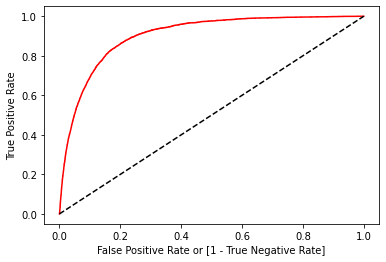

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [27]:
print(' AUC of RoC :',     auc)


 AUC of RoC : 0.656860656137376


In [28]:
# Auc is may not be the best but above avarage


# Model 2 

In [144]:
#Let us to the same with removing columns with non relevant data (assuming)

In [146]:
bankdata2 = bankdata.copy()

In [147]:
bankdata2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [163]:
bankdata3 = bankdata2.drop(['poutcome','contact', 'duration','pdays','previous','day', 'month'], axis=1)

# dropping the columns where ambiguous data presetn

In [164]:
bankdata3.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,campaign,y
0,24060,33,admin.,married,tertiary,no,882,no,no,1,no
1,24064,33,services,married,secondary,no,3444,yes,no,1,yes
2,24077,36,management,married,tertiary,no,0,yes,no,1,yes
3,24080,56,technician,married,secondary,no,589,yes,no,1,yes
4,24127,51,admin.,single,secondary,no,3132,no,no,1,no
...,...,...,...,...,...,...,...,...,...,...,...
6407,45194,59,management,married,tertiary,no,138,yes,yes,2,no
6408,45195,68,retired,married,secondary,no,1146,no,no,1,yes
6409,45201,53,management,married,tertiary,no,583,no,no,1,yes
6410,45204,73,retired,married,secondary,no,2850,no,no,1,yes


In [165]:
#bankdata2.loc[bankdata2['contact'] == 'cellular','contact'] = 'yes'
#bankdata2.loc[bankdata2['contact'] == 'telephone','contact'] = 'yes'
#bankdata2.loc[bankdata2['contact'] == 'unknown','contact'] = 'no'


In [166]:
bankdata3_dum = pd.get_dummies(bankdata3, drop_first=True)

In [167]:
bankdata3_dum.shape

(6412, 23)

In [168]:
# Dividing our data into input and output variables 
X = bankdata3_dum.iloc[:,0:22]
Y = bankdata3_dum.iloc[:,22]

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 365)
X_train.shape, X_test.shape

((5129, 22), (1283, 22))

In [170]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter = 10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [171]:
#Predict for X dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [172]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.7537022603273578

In [173]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[907  70]
 [246  60]]


In [174]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       977
           1       0.46      0.20      0.28       306

    accuracy                           0.75      1283
   macro avg       0.62      0.56      0.56      1283
weighted avg       0.71      0.75      0.71      1283



Text(0, 0.5, 'True Positive Rate')

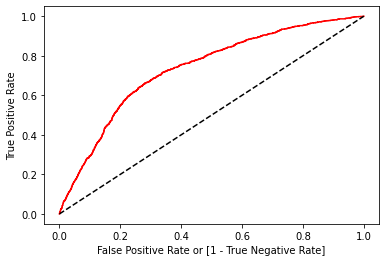

In [175]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [176]:
print(' AUC of RoC :',     auc)

 AUC of RoC : 0.5622152648162643


In [ ]:
# from above regression summary and auc
# the accuracy of and recall of oredicting 0 has reduced but the same for predicting 1 increased
# the auc also decreased substantially
# it means some of the columns have relevance

# Model 3

In [ ]:
# lets try another model where we keep all the colums but modify some data depending on the nature

In [271]:
bankdata2 = bankdata.copy()

In [272]:
bankdata2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [273]:
# dropping rows where unknown data is present 

bankdata2.drop(bankdata2.loc[bankdata2['poutcome']=='unknown'].index, inplace=True)
bankdata2.drop(bankdata2.loc[bankdata2['poutcome']=='other'].index, inplace=True)



In [274]:
# changing rows vlues to relevant notation so that number of dummies can be reduced

bankdata2.loc[bankdata2['contact'] == 'unknown','contact'] = 'no'
bankdata2.loc[bankdata2['contact'] == 'cellular','contact'] = 'yes'
bankdata2.loc[bankdata2['contact'] == 'telephone','contact'] = 'yes'

In [275]:
bankdata3.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,contact,campaign,poutcome,y
0,24060,33,admin.,married,tertiary,no,882,no,no,telephone,1,failure,no
1,24064,33,services,married,secondary,no,3444,yes,no,telephone,1,failure,yes
2,24077,36,management,married,tertiary,no,0,yes,no,telephone,1,failure,yes
3,24080,56,technician,married,secondary,no,589,yes,no,unknown,1,success,yes
4,24127,51,admin.,single,secondary,no,3132,no,no,telephone,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,45194,59,management,married,tertiary,no,138,yes,yes,cellular,2,failure,no
6408,45195,68,retired,married,secondary,no,1146,no,no,cellular,1,success,yes
6409,45201,53,management,married,tertiary,no,583,no,no,cellular,1,success,yes
6410,45204,73,retired,married,secondary,no,2850,no,no,cellular,1,failure,yes


In [276]:
# creating Dummies

bankdata3_dum = pd.get_dummies(bankdata3, drop_first=True)

In [277]:
bankdata3_dum.shape

(6412, 26)

In [278]:
# Dividing our data into input and output variables 

X = bankdata3_dum.iloc[:,0:25]
Y = bankdata3_dum.iloc[:,25]

In [279]:
Y.head()

24060    0
24064    1
24077    1
24080    1
24127    0
Name: y_yes, dtype: uint8

In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 365)
X_train.shape, X_test.shape

((5129, 25), (1283, 25))

In [281]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter = 10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [282]:
#Predict for X dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [283]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.8106001558846454

In [284]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[881  96]
 [147 159]]


In [285]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       977
           1       0.62      0.52      0.57       306

    accuracy                           0.81      1283
   macro avg       0.74      0.71      0.72      1283
weighted avg       0.80      0.81      0.80      1283



Text(0, 0.5, 'True Positive Rate')

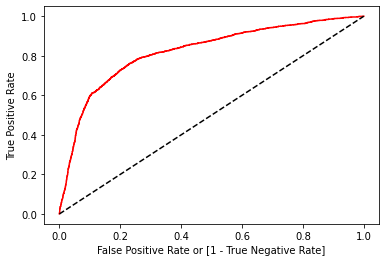

In [286]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [287]:
print(' AUC of RoC :',     auc)

 AUC of RoC : 0.7106739318040419


In [288]:
# as we can see the model AUC  is improved and recalll and precision for the out put also good

# Model 4

In [289]:
#Let us to the same with removing columns with non relevant data (assuming) and modifying some data

In [290]:
bankdata2 = bankdata.copy()

In [291]:
bankdata2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [292]:
# dropping unknow rows in poutcome

bankdata2.drop(bankdata2.loc[bankdata2['poutcome']=='unknown'].index, inplace=True)
bankdata2.drop(bankdata2.loc[bankdata2['poutcome']=='other'].index, inplace=True)





In [265]:
# Dropping the columns those are irrelevant (Assuming)

bankdata3 = bankdata2.drop(['duration','pdays','previous','day', 'month'], axis=1)

In [293]:
# Modifying the data to simplyfy dummies 

bankdata3.loc[bankdata2['contact'] == 'cellular','contact'] = 'yes'
bankdata3.loc[bankdata2['contact'] == 'telephone','contact'] = 'yes'
bankdata3.loc[bankdata2['contact'] == 'unknown','contact'] = 'no'


In [294]:
bankdata3.reset_index()

,index,age,job,marital,education,default,balance,housing,loan,contact,campaign,poutcome,y
0,24060,33,admin.,married,tertiary,no,882,no,no,yes,1,failure,no
1,24064,33,services,married,secondary,no,3444,yes,no,yes,1,failure,yes
2,24077,36,management,married,tertiary,no,0,yes,no,yes,1,failure,yes
3,24080,56,technician,married,secondary,no,589,yes,no,no,1,success,yes
4,24127,51,admin.,single,secondary,no,3132,no,no,yes,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,45194,59,management,married,tertiary,no,138,yes,yes,yes,2,failure,no
6408,45195,68,retired,married,secondary,no,1146,no,no,yes,1,success,yes
6409,45201,53,management,married,tertiary,no,583,no,no,yes,1,success,yes
6410,45204,73,retired,married,secondary,no,2850,no,no,yes,1,failure,yes


In [295]:
# creating dummies
bankdata3_dum = pd.get_dummies(bankdata3, drop_first=True)

In [296]:
bankdata3_dum.shape

(6412, 25)

In [297]:
# Dividing our data into input and output variables 
X = bankdata3_dum.iloc[:,0:24]
Y = bankdata3_dum.iloc[:,24]

In [298]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 365)
X_train.shape, X_test.shape

((5129, 24), (1283, 24))

In [299]:
#Logistic regression and fit the model
classifier = LogisticRegression(max_iter = 10000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [300]:
#Predict for X dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [301]:
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.8106001558846454

In [302]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[881  96]
 [147 159]]


In [303]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       977
           1       0.62      0.52      0.57       306

    accuracy                           0.81      1283
   macro avg       0.74      0.71      0.72      1283
weighted avg       0.80      0.81      0.80      1283



Text(0, 0.5, 'True Positive Rate')

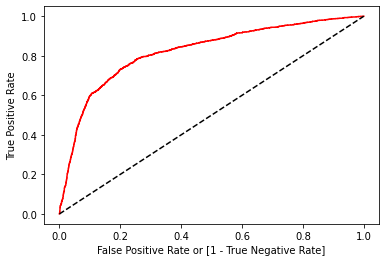

In [304]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [305]:
print(' AUC of RoC :',     auc)

 AUC of RoC : 0.7106739318040419


In [ ]:
# as can be observed from the above last two models the presence of duration','pdays','previous','day', 'month' columns
# has no effect so they can be dropped

In [ ]:
# the AUC score is good enough and it can be taken as good model
# though support is low it is more a=or less balnced
# either third or 4th model can be employed